In [1]:
import os
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.ndimage import gaussian_filter1d

In [3]:
df0 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.7_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df1 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.7_frac0.5_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df2 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.7_frac0.25_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df3 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.7_frac0.125_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df4 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.7_frac0.0625_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df5 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.7_frac0.03125_ori.txt', sep='\t', header=None, names=['classname', 'counts'])

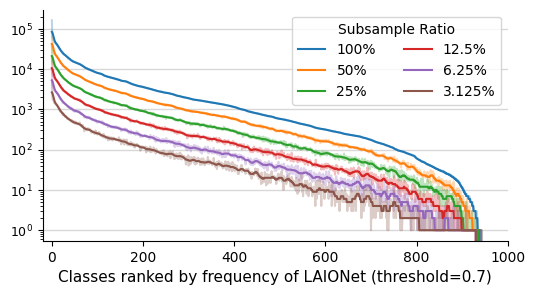

In [12]:
idxs = df0['counts'].sort_values(ascending=False).index

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
plt.plot(df0['counts'].iloc[idxs].values, alpha=.3, color='tab:blue')
plt.plot(df1['counts'].iloc[idxs].values, alpha=.3, color='tab:orange')
plt.plot(df2['counts'].iloc[idxs].values, alpha=.3, color='tab:green')
plt.plot(df3['counts'].iloc[idxs].values, alpha=.3, color='tab:red')
plt.plot(df4['counts'].iloc[idxs].values, alpha=.3, color='tab:purple')
plt.plot(df5['counts'].iloc[idxs].values, alpha=.3, color='tab:brown')

plt.plot(gaussian_filter1d(df0['counts'].iloc[idxs].values, sigma=3), alpha=1, color='tab:blue', label='100%')
plt.plot(gaussian_filter1d(df1['counts'].iloc[idxs].values, sigma=3), alpha=1, color='tab:orange', label='50%')
plt.plot(gaussian_filter1d(df2['counts'].iloc[idxs].values, sigma=3), alpha=1, color='tab:green', label='25%')
plt.plot(gaussian_filter1d(df3['counts'].iloc[idxs].values, sigma=3), alpha=1, color='tab:red', label='12.5%')
plt.plot(gaussian_filter1d(df4['counts'].iloc[idxs].values, sigma=3), alpha=1, color='tab:purple', label='6.25%')
plt.plot(gaussian_filter1d(df5['counts'].iloc[idxs].values, sigma=3), alpha=1, color='tab:brown', label='3.125%')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_tick_params(labelsize=9, rotation=0)
ax.yaxis.grid(color='gray', linestyle='-', linewidth=1, alpha=0.3)
ax.set_xlim(-20, 1000)
ax.set_xlabel('Classes ranked by frequency of LAIONet (threshold=0.7)', fontsize=11)

plt.yscale('log')
plt.legend(title='Subsample Ratio', ncols=2)
plt.savefig('figs/laionet_subsample_distrib.pdf', bbox_inches='tight', dpi=300)

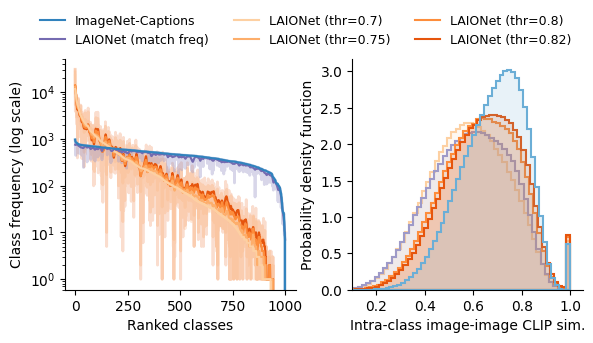

In [45]:
df0 = pd.read_csv('../metadata/freqs/class_frequency_incap_imagenet_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df1 = pd.read_csv('../metadata/freqs/class_frequency_laionet_match_incap_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df2 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.7_n448896_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df3 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.75_n448896_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df4 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.8_n448896_ori.txt', sep='\t', header=None, names=['classname', 'counts'])
df5 = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.82_n448896_ori.txt', sep='\t', header=None, names=['classname', 'counts'])

idxs0 = df0['counts'].sort_values(ascending=False).index
idxs = df2['counts'].sort_values(ascending=False).index
palette = sns.color_palette('tab20c')
palette1 = [palette[0], palette[12], palette[7], palette[6], palette[5], palette[4]]
palette2 = [palette[1], palette[13], palette[7], palette[6], palette[5], palette[4]]
fig, ax = plt.subplots(1, 2, figsize=(6.8, 3))
ax[0].plot(df5['counts'].iloc[idxs].values, alpha=.2, color=palette2[5], linewidth=2)
ax[0].plot(df4['counts'].iloc[idxs].values, alpha=.2, color=palette2[4], linewidth=2)
ax[0].plot(df3['counts'].iloc[idxs].values, alpha=.2, color=palette2[3], linewidth=2)
ax[0].plot(df2['counts'].iloc[idxs].values, alpha=.2, color=palette2[2], linewidth=2)
ax[0].plot(df1['counts'].iloc[idxs0].values, alpha=.4, color=palette2[1], linewidth=2)
ax[0].plot(df0['counts'].iloc[idxs0].values, alpha=.4, color=palette2[0], linewidth=2)

ax[0].plot(gaussian_filter1d(df5['counts'].iloc[idxs].values, sigma=3), alpha=1, color=palette1[5], linewidth=1.5, label='LAIONet (thr=0.82)')
ax[0].plot(gaussian_filter1d(df4['counts'].iloc[idxs].values, sigma=3), alpha=1, color=palette1[4], linewidth=1.5, label='LAIONet (thr=0.8)')
ax[0].plot(gaussian_filter1d(df3['counts'].iloc[idxs].values, sigma=3), alpha=1, color=palette1[3], linewidth=1.5, label='LAIONet (thr=0.75)')
ax[0].plot(gaussian_filter1d(df2['counts'].iloc[idxs].values, sigma=3), alpha=1, color=palette1[2], linewidth=1.5, label='LAIONet (thr=0.7)')
ax[0].plot(gaussian_filter1d(df1['counts'].iloc[idxs0].values, sigma=3), alpha=1, color=palette1[1], linewidth=1.5, label='LAIONet (match freq)')
ax[0].plot(df0['counts'].iloc[idxs0].values, alpha=1, color=palette1[0], linewidth=1.5, label='ImageNet-Captions')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].set_yscale('log')

# Note: run ../tools/eval_img2img_sims.py to generate the following files
paths = [
    '../results/laionet_thresh0.7_448896_sims.pth',
    '../results/laionet_match_incap_416489_sims.pth',
    # '../results/laionet_thresh0.75_448896_sims.pth',
    '../results/laionet_thresh0.8_448896_sims.pth',
    '../results/laionet_thresh0.82_448896_sims.pth',
    '../results/incap_description_cname_448896_sims.pth',
]

sims = []
for path in paths:
    if os.path.exists(path):
        sim = torch.load(path, map_location='cpu')
        sims.append(np.concatenate(list(sim.values())))

labels = ['LAIONet (thr=0.7)', 'LAIONet (match freq)', 'LAIONet (thr=0.8)', 'LAIONet (thr=0.82)', 'ImageNet-Captions']
colors = [palette2[2], palette2[1], palette2[4], palette2[5], palette2[0]]
for sim, color, label in zip(sims, colors, labels):
    ax[1].hist(sim, bins=60, color=color, density=True, histtype='stepfilled', alpha=.15)
    ax[1].hist(sim, bins=60, label=label, color=color, edgecolor=color, lw=1.5, density=True, histtype='stepfilled', facecolor="None")

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], ncols=3, fontsize=9, loc='upper left', frameon=False, bbox_to_anchor=(-1.4, 1.24))

ax[1].set_xlim(xmin=.1)
ax[0].tick_params(axis='y', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)
ax[0].set_xlabel('Ranked classes', fontsize=10)
ax[1].set_xlabel('Intra-class image-image CLIP sim.', fontsize=10)
ax[0].set_ylabel('Class frequency (log scale)', fontsize=10)
ax[1].set_ylabel('Probability density function', fontsize=10)

ax[0].set_box_aspect(1)
ax[1].set_box_aspect(1)

plt.savefig('figs/laionet_thresh_distrib.pdf', bbox_inches='tight', dpi=300)
plt.show()